In [86]:
# Dependencies

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

In [87]:
# path to clean file with data
clean_file = 'Resources/HomeValue_clean.csv'

#read file to DataFrame
homes_value_orig_df = pd.read_csv(clean_file)

In [338]:
homes_value_orig_df.head()

,County,State,Home Type,Avg house price
0,Los Angeles,CA,4 bedroom,722251.25
1,San Diego,CA,4 bedroom,698838.33
2,Orange,CA,4 bedroom,860278.42
3,Riverside,CA,4 bedroom,448650.92
4,San Bernardino,CA,4 bedroom,444484.50
...,...,...,...,...
332,Mono,CA,5 bedroom,1166818.33
333,Trinity,CA,5 bedroom,394104.17
334,Modoc,CA,5 bedroom,210738.33
335,Sierra,CA,5 bedroom,459396.92


In [89]:
homes_value_orig_df['Home Type'].unique()

array(['4 bedroom', 'single family', '1 bedroom', '2 bedroom', 'condo',
       '5 bedroom'], dtype=object)

In [250]:
# choose data for each home type
one_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '1 bedroom']
one_bedroom = one_bedroom.sort_values('Avg house price')

two_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '2 bedroom']
two_bedroom = two_bedroom.sort_values('Avg house price')

three_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '3 bedroom']
three_bedroom = three_bedroom.sort_values('Avg house price')

four_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '4 bedroom']
four_bedroom = four_bedroom.sort_values('Avg house price')

five_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '5 bedroom']
five_bedroom = five_bedroom.sort_values('Avg house price')

condo = homes_value_orig_df[homes_value_orig_df['Home Type'] == 'condo']
condo = condo.sort_values('Avg house price')

# df with cheapest house price
cheapest_place_ca = one_bedroom.head(10) 
cheapest_place_ca = pd.concat([cheapest_place_ca, two_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, three_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, four_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, five_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, condo.head(10)], ignore_index=True)

# df with most expensive price
expensive_place_ca = one_bedroom.tail(10) 
expensive_place_ca = pd.concat([expensive_place_ca, two_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, three_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, four_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, five_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, condo.tail(10)], ignore_index=True)

### 1. What is the most dangerous and safest place to live in California according to the crime rate for the population and type of crimes in that county?

In [251]:
#Crime Table
CrimeData = "C:\\Users\\mgeam\\BestCityToLiveCA\\CrimeRates.csv"
open(CrimeData)
os.path.exists(CrimeData)
CrimeTable = pd.read_csv(CrimeData)

In [252]:
#Population Table
PopData = "C:\\Users\\mgeam\\BestCityToLiveCA\\Resources\\CrimeData\\CountyPopulation.csv"
open(PopData)
os.path.exists(PopData)
PopTable = pd.read_csv(PopData)
CleanPopTable = PopTable.dropna(axis='rows')
CleanerPopTable = ViolentCrime = CleanPopTable.drop([113, 114, 115, 116, 117])
CleanestPopTable = CleanerPopTable.set_index('County')
IntPopTable = CleanestPopTable.apply(pd.to_numeric, errors='coerce')


In [340]:
#Violent Crime Table
ViolentCrime = CrimeTable.drop([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
del ViolentCrime['Crimes']
TransposeViolentCrime = ViolentCrime.T
ViolentCrimeTable = TransposeViolentCrime.sort_values(by=[0])
MergeViolentCrimeTable = ViolentCrimeTable.merge(IntPopTable, left_index=True, right_index=True)
MergeViolentCrimeTable['Violent Crime Rate'] = MergeViolentCrimeTable[0]/IntPopTable['Population']
FinalViolentCrimeRateTable = MergeViolentCrimeTable.sort_values(by=['Violent Crime Rate'])
FinalViolentCrimeRateTable['Violent Crime Rate'] = FinalViolentCrimeRateTable['Violent Crime Rate'].map("{:.2%}".format)

#Property Crime Table
PropertyCrime = CrimeTable.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
del PropertyCrime['Crimes']
TransposePropertyCrime = PropertyCrime.T
PropertyCrimeTable = TransposePropertyCrime.sort_values(by=[11])
MergePropertyCrimeTable = PropertyCrimeTable.merge(IntPopTable, left_index=True, right_index=True)
MergePropertyCrimeTable['Property Crime Rate'] = MergePropertyCrimeTable[11]/IntPopTable['Population']
FinalPropertyCrimeTable = MergePropertyCrimeTable.sort_values(by=['Property Crime Rate'])
FinalPropertyCrimeTable['Property Crime Rate'] = FinalPropertyCrimeTable['Property Crime Rate'].map("{:.2%}".format)

#All Crime Rate 
AllCrimeTable = PropertyCrimeTable.merge(TransposeViolentCrime, left_index=True, right_index=True)
MergeAllCrimeTable = AllCrimeTable.merge(IntPopTable, left_index=True, right_index=True)
MergeAllCrimeTable['Crime Rate'] = (MergeAllCrimeTable[11] + MergeAllCrimeTable[0])/IntPopTable['Population']
AllCrimeRateTable = MergeAllCrimeTable.sort_values(['Crime Rate'], ascending=False)
AllCrimeRateTable['Crime Rate'] = AllCrimeRateTable['Crime Rate'].map("{:.2%}".format)
AllCrimeRateTable['Crime Rank'] = AllCrimeRateTable['Crime Rate'].rank(method='max')
AllCrimeRateTable=AllCrimeRateTable.rename(columns={11: 'Property Crime'})
AllCrimeRateTable=AllCrimeRateTable.rename(columns={0: 'Violent Crime'})
 

In [342]:
#one_bedroom=one_bedroom.set_index('County')
one_bedroom['Price Rank'] = one_bedroom['Avg house price'].rank(method='max')
OneBedCrimeAndRent=AllCrimeRateTable.merge(one_bedroom, left_index=True, right_index=True)
OneBedCrimeAndRent= OneBedCrimeAndRent.sort_values(['Avg house price'], ascending=False)
OneBedCrimeAndRent=OneBedCrimeAndRent.reset_index()
OneBedCrimeAndRent=OneBedCrimeAndRent.rename(columns={'index': 'County'})
OneBedCrimeAndRent=OneBedCrimeAndRent.drop('State', axis =1)
OneBedCrimeAndRent['Rank']=(OneBedCrimeAndRent['Crime Rank']+OneBedCrimeAndRent['Price Rank'])/2
OneBedCrimeAndRent['Rank']= OneBedCrimeAndRent['Rank'].rank(method='max')
OneBedCrimeAndRent['Percentile Rank'] = OneBedCrimeAndRent['Rank'].rank(pct=True)
OneBedCrimeAndRent.head()

,County,Property Crime,Violent Crime,Population,Crime Rate,Crime Rank,Home Type,Avg house price,Price Rank,Rank,Percentile Rank
0,San Francisco,50012,6092,829072,6.77%,57.0,1 bedroom,907512.08,56.0,55.0,1.000000
1,Marin,5443,516,256802,2.32%,30.0,1 bedroom,708654.92,55.0,49.0,0.881818
2,San Mateo,16272,1837,739837,2.45%,33.0,1 bedroom,670793.83,54.0,50.0,0.909091
3,Santa Barbara,7307,1529,431555,2.05%,15.0,1 bedroom,606090.17,53.0,40.0,0.727273
4,Santa Cruz,7005,1106,267203,3.04%,46.0,1 bedroom,594940.50,52.0,53.0,0.963636


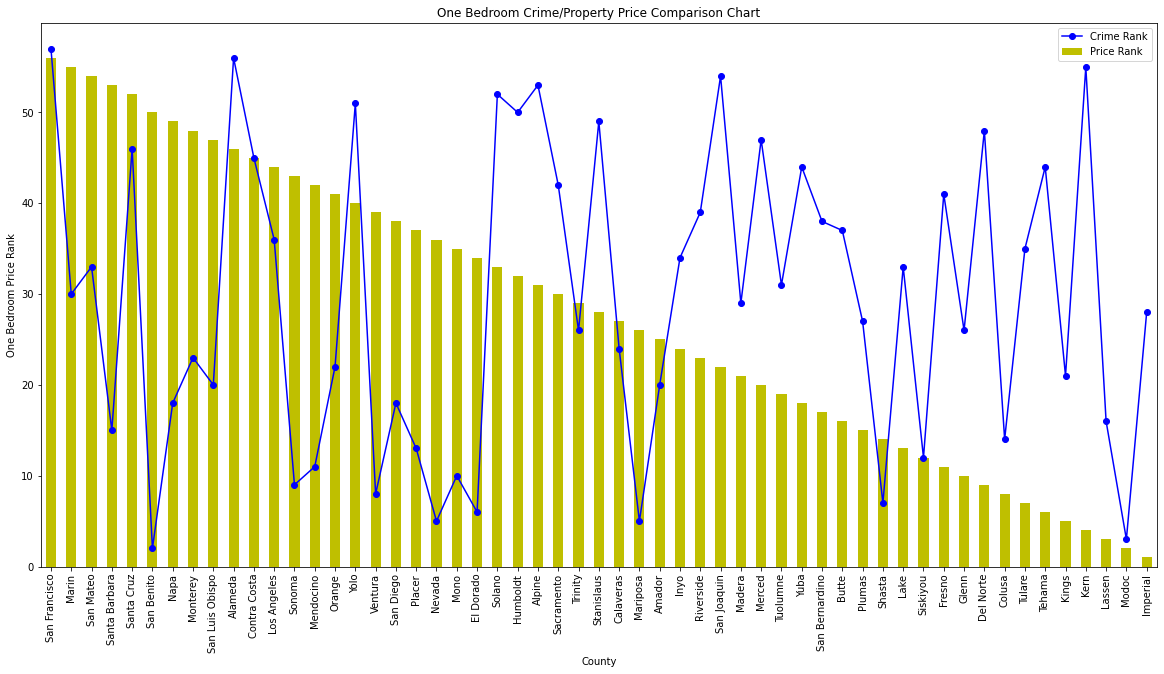

In [335]:
ax = OneBedCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
OneBedCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('One Bedroom Crime/Property Price Comparison Chart')
plt.ylabel('One Bedroom Price Rank')
plt.show()


In [308]:
#two_bedroom=two_bedroom.set_index('County')
two_bedroom['Price Rank'] = two_bedroom['Avg house price'].rank(method='max')
TwoBedCrimeAndRent=AllCrimeRateTable.merge(two_bedroom, left_index=True, right_index=True)
TwoBedCrimeAndRent= TwoBedCrimeAndRent.sort_values(['Avg house price'], ascending=False)
TwoBedCrimeAndRent=TwoBedCrimeAndRent.reset_index()
TwoBedCrimeAndRent=TwoBedCrimeAndRent.rename(columns={'index': 'County'})
TwoBedCrimeAndRent=TwoBedCrimeAndRent.drop('State', axis =1)
TwoBedCrimeAndRent['Rank']=(TwoBedCrimeAndRent['Crime Rank']+TwoBedCrimeAndRent['Price Rank'])/2
TwoBedCrimeAndRent['Rank']= TwoBedCrimeAndRent['Rank'].rank(method='max')
TwoBedCrimeAndRent['Percentile Rank'] = TwoBedCrimeAndRent['Rank'].rank(pct=True)
TwoBedCrimeAndRent.head()

,County,Property Crime,Violent Crime,Population,Crime Rate,Crime Rank,Home Type,Avg house price,Price Rank,Rank,Percentile Rank
0,San Francisco,50012,6092,829072,6.77%,57.0,2 bedroom,1341905.25,57.0,56.0,1.000000
1,San Mateo,16272,1837,739837,2.45%,33.0,2 bedroom,1085578.25,56.0,53.0,0.928571
2,Marin,5443,516,256802,2.32%,30.0,2 bedroom,866585.42,55.0,48.0,0.857143
3,Santa Cruz,7005,1106,267203,3.04%,46.0,2 bedroom,696164.17,53.0,54.0,0.964286
4,Santa Barbara,7307,1529,431555,2.05%,15.0,2 bedroom,659491.83,52.0,39.0,0.687500


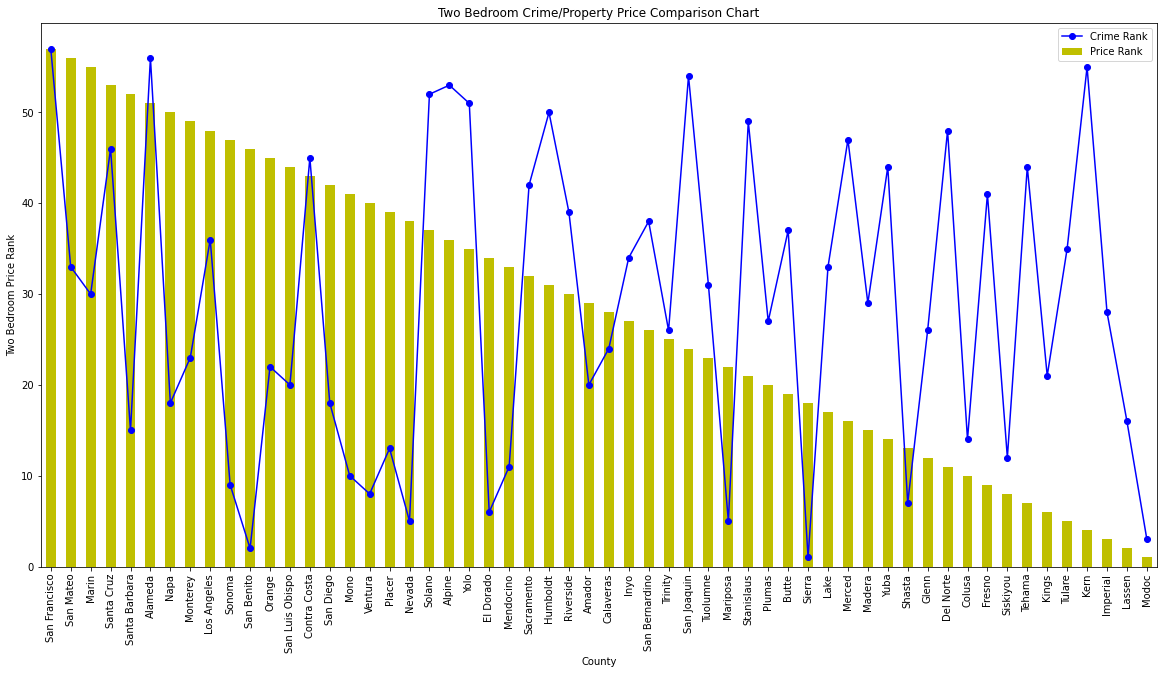

In [327]:
ax = TwoBedCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
TwoBedCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('Two Bedroom Crime/Property Price Comparison Chart')
plt.ylabel('Two Bedroom Price Rank')
plt.show()

In [310]:
#four_bedroom=four_bedroom.set_index('County')
four_bedroom['Price Rank'] = four_bedroom['Avg house price'].rank(method='max')
FourBedCrimeAndRent=AllCrimeRateTable.merge(four_bedroom, left_index=True, right_index=True)
FourBedCrimeAndRent=FourBedCrimeAndRent.sort_values(['Avg house price'], ascending=False)
FourBedCrimeAndRent=FourBedCrimeAndRent.reset_index()
FourBedCrimeAndRent=FourBedCrimeAndRent.rename(columns={'index': 'County'})
FourBedCrimeAndRent=FourBedCrimeAndRent.drop('State', axis =1)
FourBedCrimeAndRent['Rank']=(FourBedCrimeAndRent['Crime Rank']+FourBedCrimeAndRent['Price Rank'])/2
FourBedCrimeAndRent['Rank']= FourBedCrimeAndRent['Rank'].rank(method='max')
FourBedCrimeAndRent['Percentile Rank'] = FourBedCrimeAndRent['Rank'].rank(pct=True)
FourBedCrimeAndRent.head()


,County,Property Crime,Violent Crime,Population,Crime Rate,Crime Rank,Home Type,Avg house price,Price Rank,Rank,Percentile Rank
0,San Francisco,50012,6092,829072,6.77%,57.0,4 bedroom,1967083.33,58.0,57.0,1.000000
1,San Mateo,16272,1837,739837,2.45%,33.0,4 bedroom,1873701.42,57.0,54.0,0.938596
2,Marin,5443,516,256802,2.32%,30.0,4 bedroom,1449320.42,56.0,52.0,0.885965
3,Santa Cruz,7005,1106,267203,3.04%,46.0,4 bedroom,1136656.08,54.0,55.0,0.964912
4,Alameda,66731,9734,1559308,4.90%,56.0,4 bedroom,1097185.67,53.0,56.0,0.982456


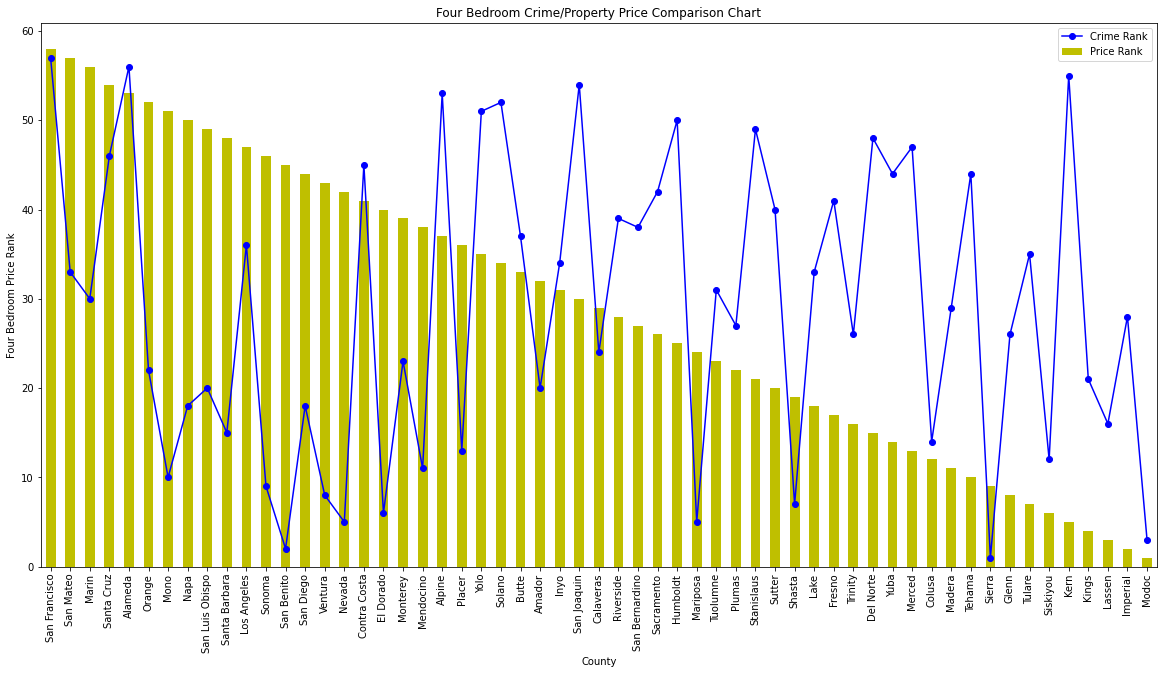

In [328]:
ax = FourBedCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
FourBedCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('Four Bedroom Crime/Property Price Comparison Chart')
plt.ylabel('Four Bedroom Price Rank')
plt.show()

In [318]:
#five_bedroom=five_bedroom.set_index('County')
five_bedroom['Price Rank'] = five_bedroom['Avg house price'].rank(method='max')
FiveBedCrimeAndRent=AllCrimeRateTable.merge(five_bedroom, left_index=True, right_index=True)
FiveBedCrimeAndRent=FiveBedCrimeAndRent.sort_values(['Avg house price'], ascending=False)
FiveBedCrimeAndRent=FiveBedCrimeAndRent.reset_index()
FiveBedCrimeAndRent=FiveBedCrimeAndRent.rename(columns={'index': 'County'})
FiveBedCrimeAndRent=FiveBedCrimeAndRent.drop('State', axis =1)
FiveBedCrimeAndRent['Rank']=(FiveBedCrimeAndRent['Crime Rank']+FiveBedCrimeAndRent['Price Rank'])/2
FiveBedCrimeAndRent['Rank']= FiveBedCrimeAndRent['Rank'].rank(method='max')
FiveBedCrimeAndRent['Percentile Rank'] = FiveBedCrimeAndRent['Rank'].rank(pct=True)
FiveBedCrimeAndRent.head()



,County,Property Crime,Violent Crime,Population,Crime Rate,Crime Rank,Home Type,Avg house price,Price Rank,Rank,Percentile Rank
0,San Mateo,16272,1837,739837,2.45%,33.0,5 bedroom,2664478.83,58.0,54.0,0.947368
1,San Francisco,50012,6092,829072,6.77%,57.0,5 bedroom,2560990.25,57.0,57.0,1.000000
2,Marin,5443,516,256802,2.32%,30.0,5 bedroom,2148931.42,56.0,52.0,0.894737
3,Alameda,66731,9734,1559308,4.90%,56.0,5 bedroom,1397985.42,54.0,56.0,0.982456
4,Santa Cruz,7005,1106,267203,3.04%,46.0,5 bedroom,1391903.25,53.0,55.0,0.964912


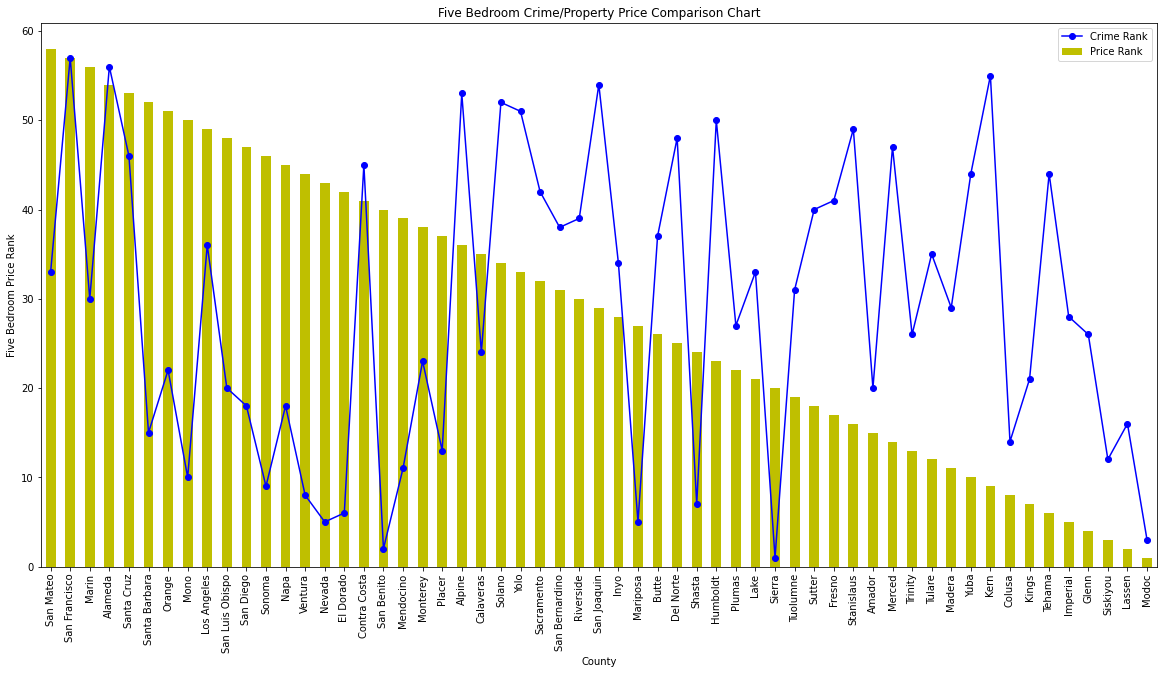

In [329]:
ax = FiveBedCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
FiveBedCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('Five Bedroom Crime/Property Price Comparison Chart')
plt.ylabel('Five Bedroom Price Rank')
plt.show()

In [337]:
#condo=condo.set_index('County')
condo['Price Rank'] = condo['Avg house price'].rank(method='max')
CondoCrimeAndRent=AllCrimeRateTable.merge(condo, left_index=True, right_index=True)
CondoCrimeAndRent=CondoCrimeAndRent.sort_values(['Avg house price'], ascending=False)
CondoCrimeAndRent=CondoCrimeAndRent.reset_index()
CondoCrimeAndRent=CondoCrimeAndRent.rename(columns={'index': 'County'})
CondoCrimeAndRent=CondoCrimeAndRent.drop('State', axis =1)
CondoCrimeAndRent['Rank']=(CondoCrimeAndRent['Crime Rank']+CondoCrimeAndRent['Price Rank'])/2
CondoCrimeAndRent['Rank']= CondoCrimeAndRent['Rank'].rank(method='max')
CondoCrimeAndRent['Percentile Rank'] = CondoCrimeAndRent['Rank'].rank(pct=True)
CondoCrimeAndRent.


,County,Property Crime,Violent Crime,Population,Crime Rate,Crime Rank,Home Type,Avg house price,Price Rank,Rank,Percentile Rank
0,San Francisco,50012,6092,829072,6.77%,57.0,condo,1227893.50,50.0,49.0,1.000000
1,San Mateo,16272,1837,739837,2.45%,33.0,condo,876678.08,49.0,44.0,0.897959
2,Marin,5443,516,256802,2.32%,30.0,condo,674089.17,47.0,41.0,0.836735
3,Contra Costa,28555,4138,1081232,3.02%,45.0,condo,658115.33,46.0,47.0,0.959184
4,Alameda,66731,9734,1559308,4.90%,56.0,condo,642329.25,45.0,48.0,0.979592
5,Santa Barbara,7307,1529,431555,2.05%,15.0,condo,582746.08,44.0,29.0,0.591837
6,Santa Cruz,7005,1106,267203,3.04%,46.0,condo,580103.50,43.0,46.0,0.938776
7,Napa,2162,753,139253,2.09%,18.0,condo,561756.25,42.0,30.0,0.612245
8,San Benito,472,147,56888,1.09%,2.0,condo,553841.08,41.0,17.0,0.326531
9,Los Angeles,224192,56416,9974203,2.81%,36.0,condo,537381.08,40.0,40.0,0.816327


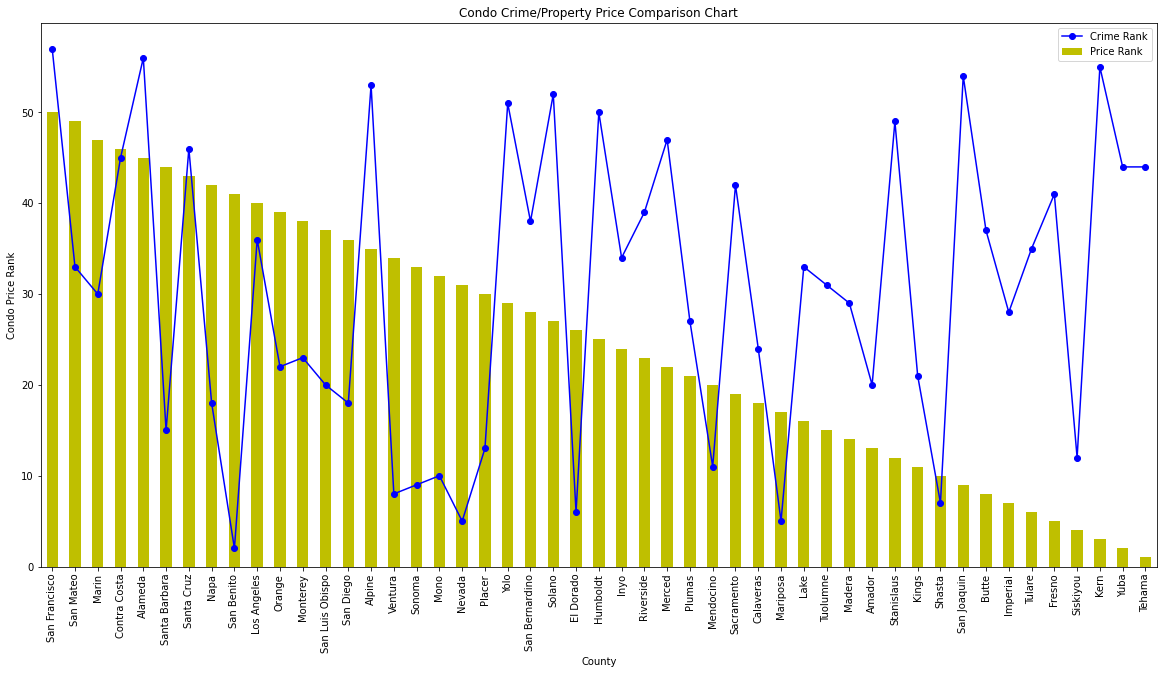

In [330]:
ax = CondoCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
CondoCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('Condo Crime/Property Price Comparison Chart')
plt.ylabel('Condo Price Rank')
plt.show()

### 2. Which county is the most cost-effective place to live in California and crime rate in this areas?

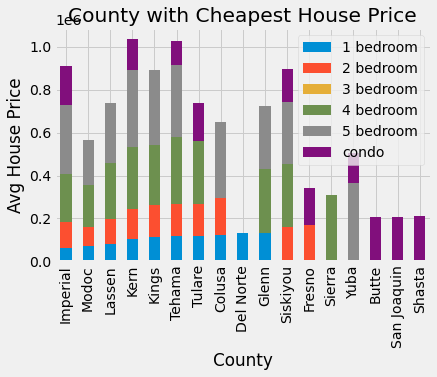

In [60]:
cheapest_1bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '1 bedroom', ['County', 'Avg house price']]
cheapest_2bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '2 bedroom', ['County', 'Avg house price']]
cheapest_3bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '3 bedroom', ['County', 'Avg house price']]
cheapest_4bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '4 bedroom', ['County', 'Avg house price']]
cheapest_5bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '5 bedroom', ['County', 'Avg house price']]
cheapest_condo = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == 'condo', ['County', 'Avg house price']]

cheap_plot = cheapest_1bd.merge(cheapest_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
cheap_plot = cheap_plot.merge(cheapest_3bd, on='County', how='outer')

cheap_plot = cheap_plot.merge(cheapest_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
cheap_plot = cheap_plot.merge(cheapest_5bd, on='County', how='outer')
cheap_plot = cheap_plot.merge(cheapest_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

cheap_plot = cheap_plot.set_index('County')
cheap_plot = cheap_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})

cheap_plot.plot(kind='bar', stacked=True)

plt.title("County with Cheapest House Price")
plt.ylabel("Avg House Price")

plt.show()



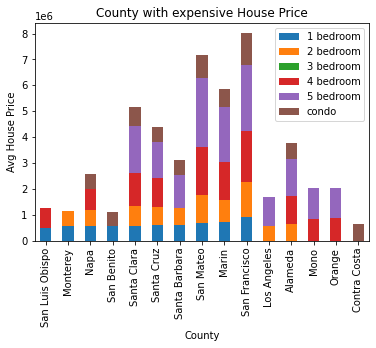

In [21]:
# Most expensive paces in CA
expensive_1bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '1 bedroom', ['County', 'Avg house price']]
expensive_2bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '2 bedroom', ['County', 'Avg house price']]
expensive_3bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '3 bedroom', ['County', 'Avg house price']]
expensive_4bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '4 bedroom', ['County', 'Avg house price']]
expensive_5bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '5 bedroom', ['County', 'Avg house price']]
expensive_condo = expensive_place_ca.loc[expensive_place_ca['Home Type'] == 'condo', ['County', 'Avg house price']]

expensive_plot = expensive_1bd.merge(expensive_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
expensive_plot = expensive_plot.merge(expensive_3bd, on='County', how='outer')

expensive_plot = expensive_plot.merge(expensive_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
expensive_plot = expensive_plot.merge(expensive_5bd, on='County', how='outer')
expensive_plot = expensive_plot.merge(expensive_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

expensive_plot = expensive_plot.set_index('County')
expensive_plot = expensive_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})

expensive_plot.plot(kind='bar', stacked=True)

plt.title("County with expensive House Price")
plt.ylabel("Avg House Price")

plt.show()

In [33]:
max_house_value = homes_value_orig_df['Avg house price'].max()
min_house_value = homes_value_orig_df['Avg house price'].min()

max_house_value

2664478.83

### House for any budget

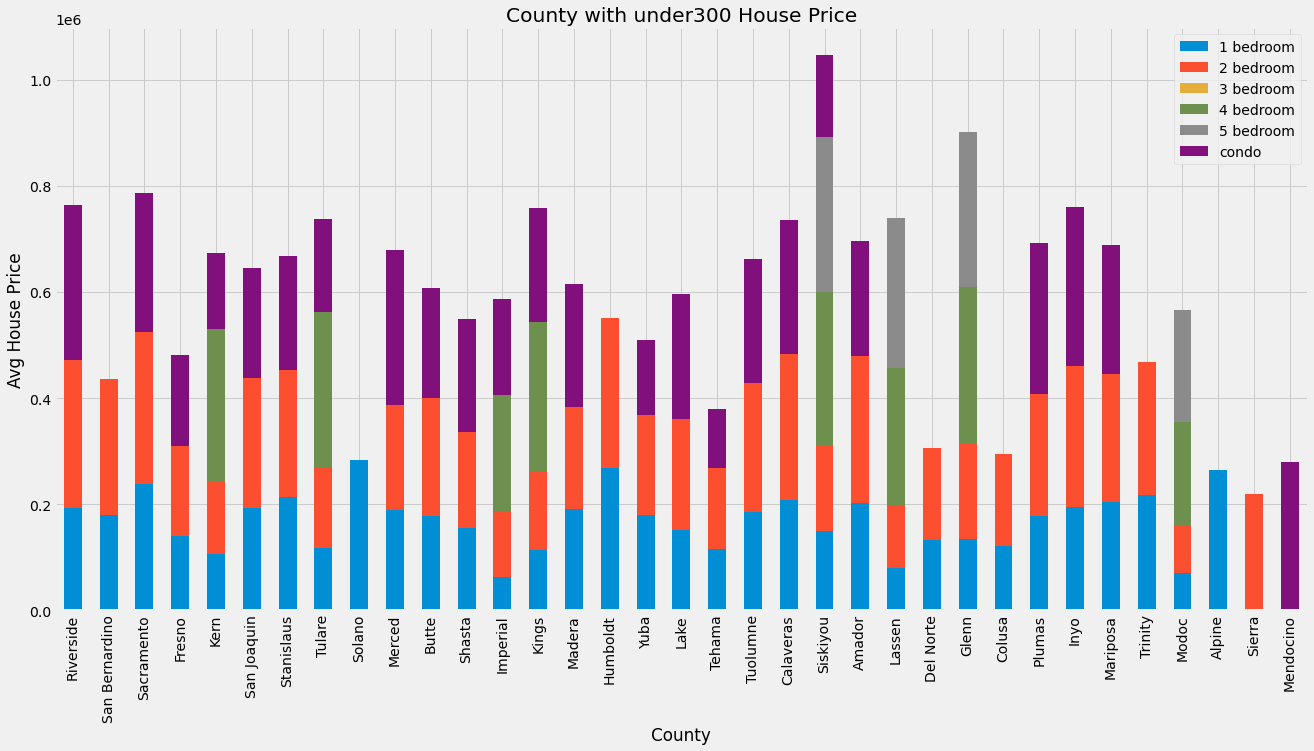

In [52]:
# Under 300 000
#under_300 = homes_value_orig_df[homes_value_orig_df['Avg house price'] < 300000 & ]


under300_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]

under300_plot = under300_1bd.merge(under300_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under300_plot = under300_plot.merge(under300_3bd, on='County', how='outer')

under300_plot = under300_plot.merge(under300_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under300_plot = under300_plot.merge(under300_5bd, on='County', how='outer')
under300_plot = under300_plot.merge(under300_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under300_plot = under300_plot.set_index('County')
under300_plot = under300_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under300_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under300 House Price")
plt.ylabel("Avg House Price")

plt.show()



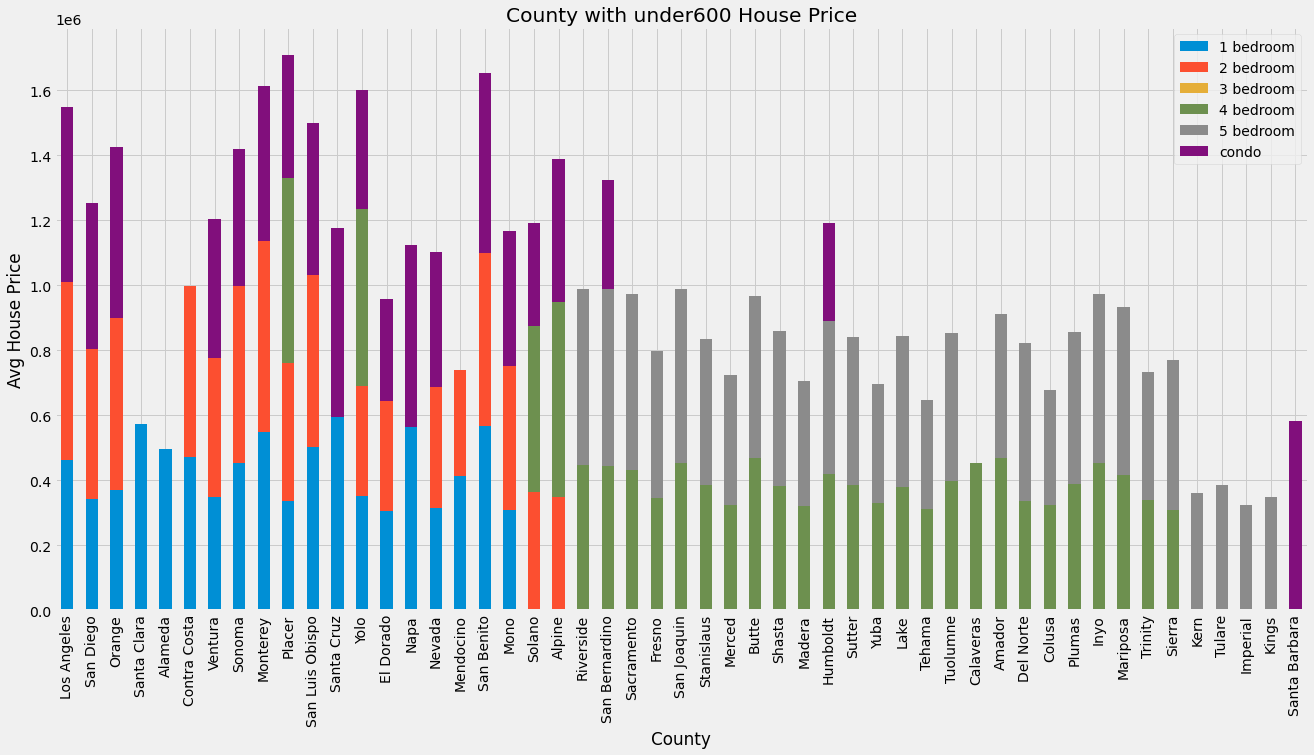

In [54]:
# between 300,000 and 600,000
under600_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 300000) 
                                         & (homes_value_orig_df['Avg house price'] < 600000)
                                         , ['County', 'Avg house price']]

under600_plot = under600_1bd.merge(under600_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under600_plot = under600_plot.merge(under600_3bd, on='County', how='outer')

under600_plot = under600_plot.merge(under600_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under600_plot = under600_plot.merge(under600_5bd, on='County', how='outer')
under600_plot = under600_plot.merge(under600_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under600_plot = under600_plot.set_index('County')
under600_plot = under600_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under600_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under600 House Price")
plt.ylabel("Avg House Price")

plt.show()

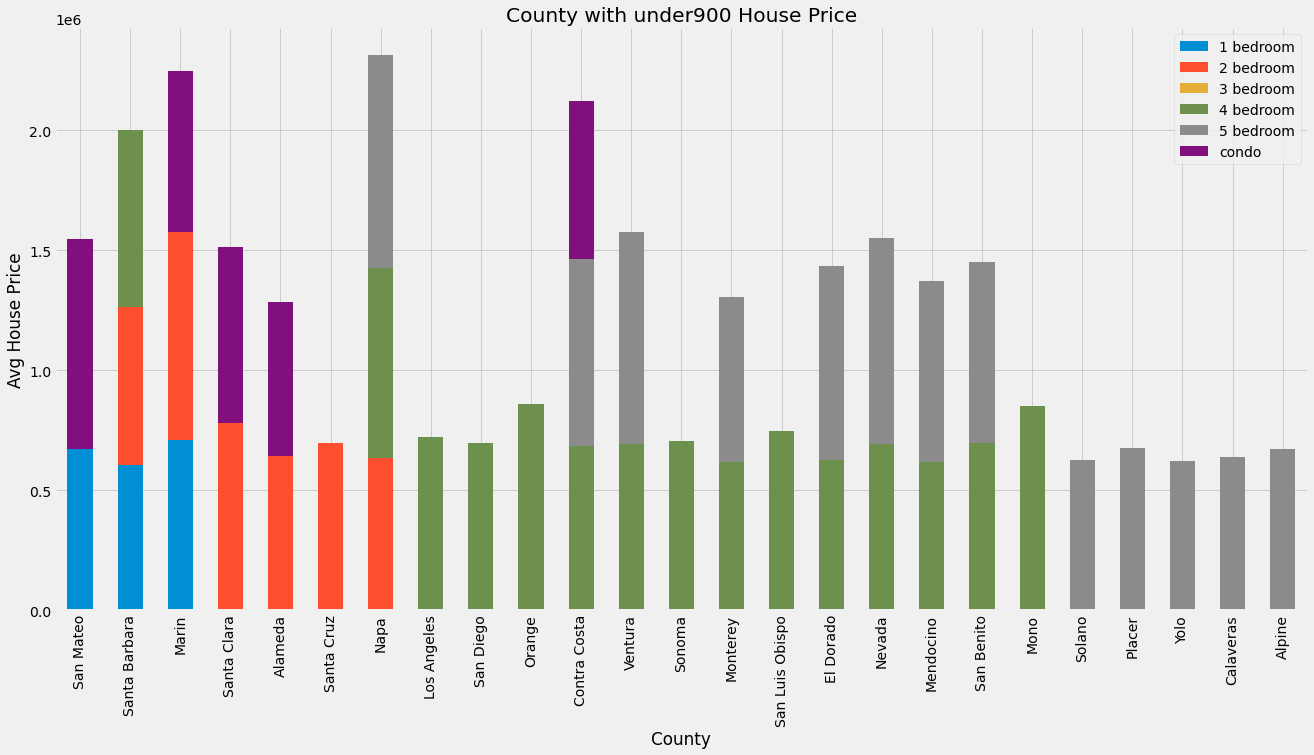

In [55]:
# between 600,000 and 900,000
under900_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 600000) 
                                         & (homes_value_orig_df['Avg house price'] < 900000)
                                         , ['County', 'Avg house price']]

under900_plot = under900_1bd.merge(under900_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under900_plot = under900_plot.merge(under900_3bd, on='County', how='outer')

under900_plot = under900_plot.merge(under900_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under900_plot = under900_plot.merge(under900_5bd, on='County', how='outer')
under900_plot = under900_plot.merge(under900_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under900_plot = under900_plot.set_index('County')
under900_plot = under900_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under900_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under900 House Price")
plt.ylabel("Avg House Price")

plt.show()

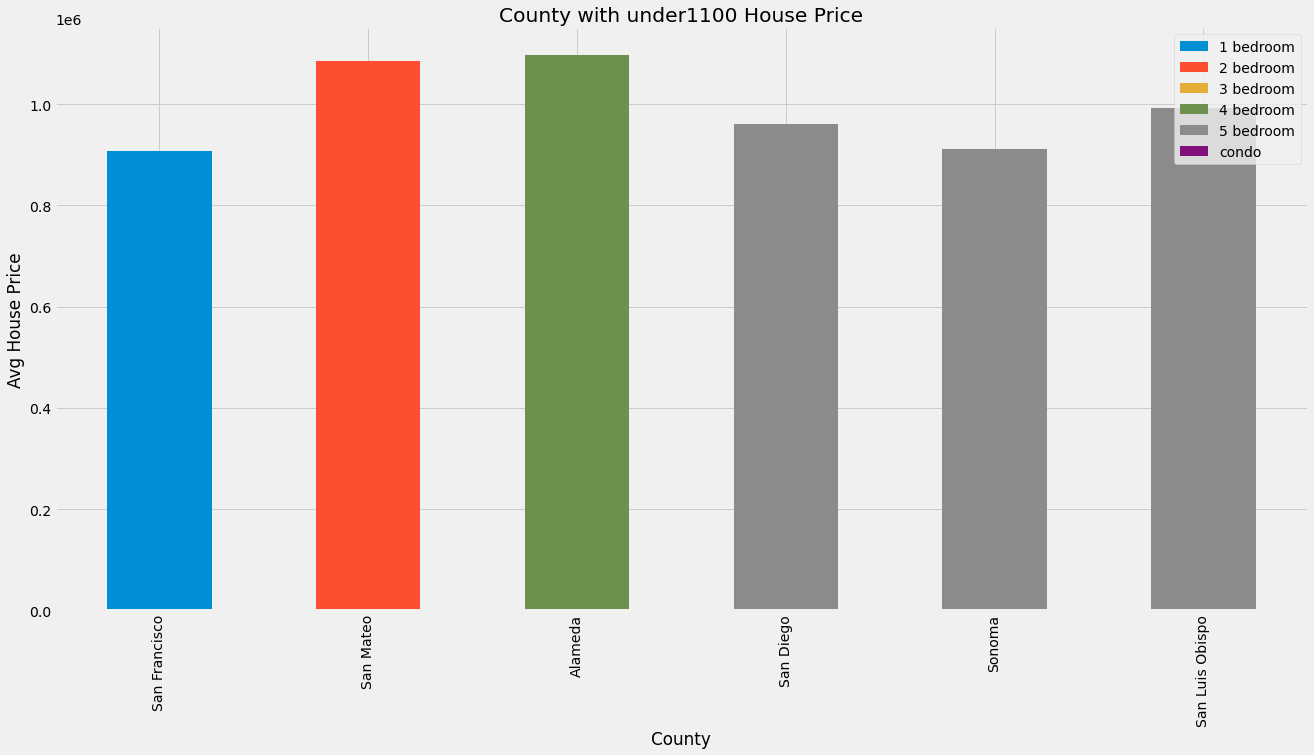

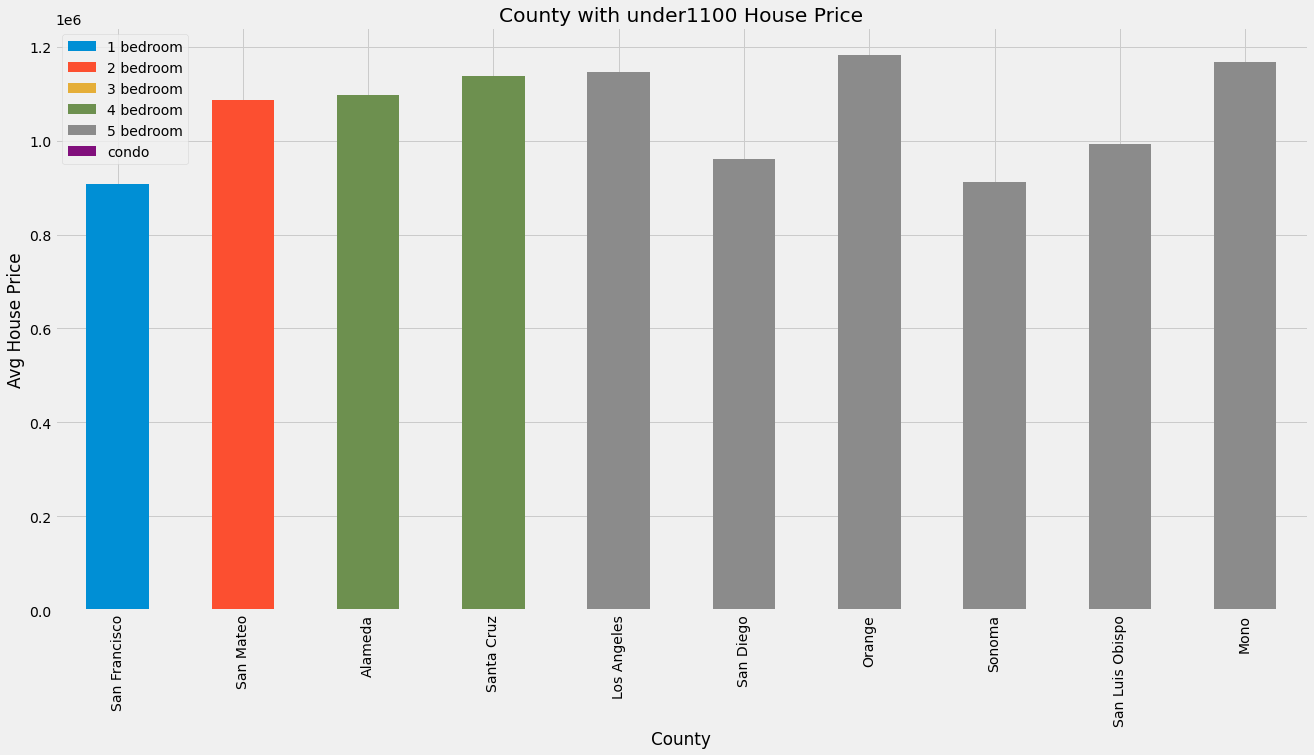

In [57]:
# between 900,000 and 1 200,000
under1100_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 900000) 
                                         & (homes_value_orig_df['Avg house price'] < 1200000)
                                         , ['County', 'Avg house price']]

under1100_plot = under1100_1bd.merge(under1100_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under1100_plot = under1100_plot.merge(under1100_3bd, on='County', how='outer')

under1100_plot = under1100_plot.merge(under1100_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under1100_plot = under1100_plot.merge(under1100_5bd, on='County', how='outer')
under1100_plot = under1100_plot.merge(under1100_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under1100_plot = under1100_plot.set_index('County')
under1100_plot = under1100_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under1100_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under1100 House Price")
plt.ylabel("Avg House Price")

plt.show()

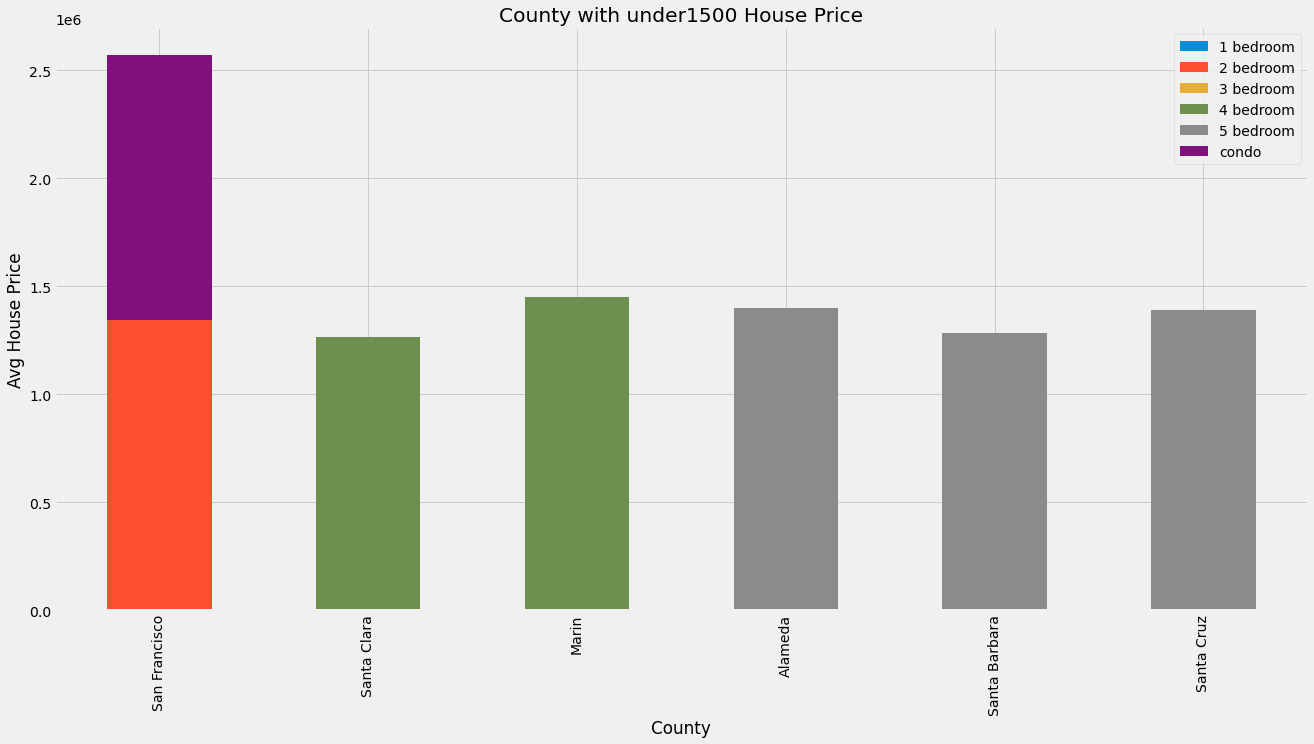

In [58]:
# between 1 200,000 and 1 500,000
under1500_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 1200000) 
                                         & (homes_value_orig_df['Avg house price'] < 1500000)
                                         , ['County', 'Avg house price']]

under1500_plot = under1500_1bd.merge(under1500_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under1500_plot = under1500_plot.merge(under1500_3bd, on='County', how='outer')

under1500_plot = under1500_plot.merge(under1500_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under1500_plot = under1500_plot.merge(under1500_5bd, on='County', how='outer')
under1500_plot = under1500_plot.merge(under1500_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under1500_plot = under1500_plot.set_index('County')
under1500_plot = under1500_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under1500_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under1500 House Price")
plt.ylabel("Avg House Price")

plt.show()